In [3]:
# pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.3 MB ? eta -:--:--
     ---------------------------------------- 0.2/57.3 MB 3.3 MB/s eta 0:00:18
     ---------------------------------------- 0.2/57.3 MB 2.3 MB/s eta 0:00:25
     ---------------------------------------- 0.2/57.3 MB 1.7 MB/s eta 0:00:35
     ---------------------------------------- 0.3/57.3 MB 1.6 MB/s eta 0:00:37
     --------------

In [19]:
import os
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
key = ""
# Enter your API key from tiingo documentation 

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\preet\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [9]:
df.to_csv('AAPL.csv')

In [11]:
df = pd.read_csv('AAPL.csv')

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-04 00:00:00+00:00,195.69,196.37,193.14,194.79,19114275,47.096166,47.259819,46.482464,46.879565,76457100,0.0,1.0
1,AAPL,2019-04-05 00:00:00+00:00,197.00,197.10,195.93,196.45,18526644,47.411440,47.435507,47.153926,47.279073,74106576,0.0,1.0
2,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
3,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
4,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0


In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-03-25 00:00:00+00:00,170.85,171.94,169.450,170.565,54288328,170.85,171.94,169.450,170.565,54288328,0.0,1.0
1252,AAPL,2024-03-26 00:00:00+00:00,169.71,171.42,169.580,170.000,57388449,169.71,171.42,169.580,170.000,57388449,0.0,1.0
1253,AAPL,2024-03-27 00:00:00+00:00,173.31,173.60,170.110,170.410,60273265,173.31,173.60,170.110,170.410,60273265,0.0,1.0
1254,AAPL,2024-03-28 00:00:00+00:00,171.48,172.23,170.510,171.750,65672690,171.48,172.23,170.510,171.750,65672690,0.0,1.0
1255,AAPL,2024-04-01 00:00:00+00:00,170.03,171.25,169.475,171.190,43772506,170.03,171.25,169.475,171.190,43772506,0.0,1.0


In [15]:
df1 = df.reset_index()['close']

In [16]:
df1.shape

(1256,)

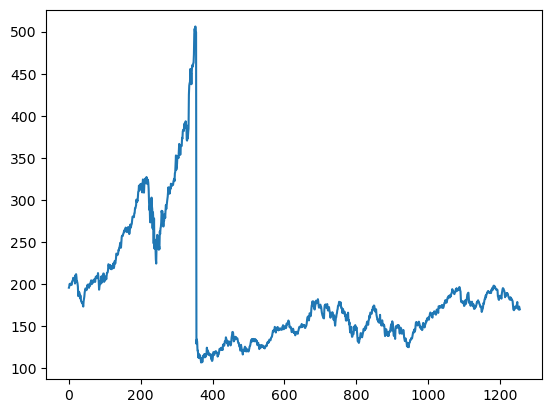

In [18]:
plt.plot(df1)

In [20]:
# LSTM is sensitive towards scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
#  Now values between 0 to 1
df1.shape

(1256, 1)

In [22]:
# Spliting the data into train and test as 0.65 and 0.35 respectively
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [23]:
training_size, test_size

(816, 440)

In [29]:
# convert the whole dataset into timesteps
def new_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [30]:
time_step = 100
X_train, y_train = new_dataset(train_data, time_step)
X_test, y_test = new_dataset(test_data, time_step)

In [33]:
print(X_train)

[[0.22254227 0.22582342 0.23358798 ... 0.26454602 0.23994991 0.24959299]
 [0.22582342 0.23358798 0.23208516 ... 0.23994991 0.24959299 0.24375704]
 [0.23358798 0.23208516 0.23489042 ... 0.24959299 0.24375704 0.24718848]
 ...
 [0.17016907 0.16974327 0.17282405 ... 0.07271133 0.07140889 0.0787226 ]
 [0.16974327 0.17282405 0.16546024 ... 0.07140889 0.0787226  0.08721353]
 [0.17282405 0.16546024 0.16418284 ... 0.0787226  0.08721353 0.08721353]]


In [34]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [35]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

12/12 [==============================] - 16s 479ms/step - loss: 0.0444 - val_loss: 6.0802e-04
Epoch 2/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0190 - val_loss: 0.0021
Epoch 3/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0113 - val_loss: 6.7442e-04
Epoch 4/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0099 - val_loss: 4.1309e-04
Epoch 5/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0088 - val_loss: 2.4314e-04
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0083 - val_loss: 3.4548e-04
Epoch 7/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0074 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0068 - val_loss: 6.0518e-04
Epoch 9/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0060 - val_loss: 4.0915e-04
Epoch 10/100
12/12 [==============================] - 2s 134m

12/12 [==============================] - 1s 96ms/step - loss: 0.0023 - val_loss: 1.9603e-04
Epoch 77/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0019 - val_loss: 1.4927e-04
Epoch 78/100
12/12 [==============================] - 1s 96ms/step - loss: 0.0017 - val_loss: 1.8348e-04
Epoch 79/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0019 - val_loss: 1.4853e-04
Epoch 80/100
12/12 [==============================] - 1s 96ms/step - loss: 0.0017 - val_loss: 2.4659e-04
Epoch 81/100
12/12 [==============================] - 1s 96ms/step - loss: 0.0027 - val_loss: 2.4090e-04
Epoch 82/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0037 - val_loss: 1.5618e-04
Epoch 83/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0029 - val_loss: 2.4589e-04
Epoch 84/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0023 - val_loss: 2.8157e-04
Epoch 85/100
12/12 [==============================] - 1s 96ms/step 

In [44]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

219.60104224422594

In [49]:
math.sqrt(mean_squared_error(y_test, test_predict))

174.38682990932907

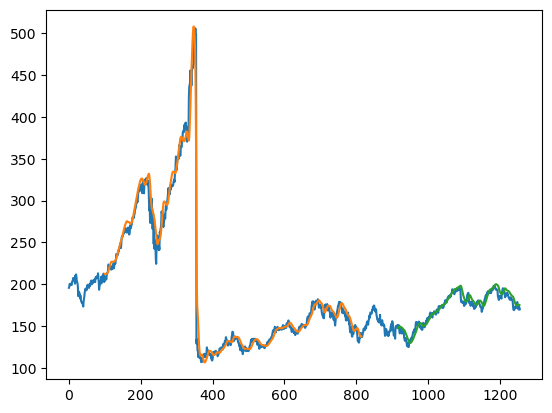

In [53]:
### Plotting 
# Complete Dataset -  Blue
# Training Dataset - Orange
# Predicted Output (For Test Data) - Green
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

440

In [59]:
# Taking previous 100 days
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
flag_input=list(x_input)
flag_input=flag_input[0].tolist()

In [61]:
flag_input

[0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16963623]
100
[0.16963623]
101
2 day input [0.19048215 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062
 0.20756418 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154
 0.20776456 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287
 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766
 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823
 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743
 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772
 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911
 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191
 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606 0.20247965
 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216 0.19586725
 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448 0.1941891
 0.18955542 0.18614903 0.18983093 0.18680025 0.1851221  0.18239198
 0.17097057 0.15849718 0.15599249 0.15569192 0.16002505 0.16508453
 0.16628679 0.16102

11 day output [[0.17808582]]
12 day input [0.2115717  0.2082154  0.20776456 0.20929242 0.20671259 0.20816531
 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014
 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091
 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025
 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249 0.15569192
 0.16002505 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892
 0.16751409 0.17342517 0.17991234 0.16162805 0.16390733 0.16032561
 0.15747026 0.1664871

19 day output [[0.1874151]]
20 day input [0.21685661 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766
 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823
 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743
 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772
 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911
 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191
 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606 0.20247965
 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216 0.19586725
 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448 0.1941891
 0.18955542 0.18614903 0.18983093 0.18680025 0.1851221  0.18239198
 0.17097057 0.15849718 0.15599249 0.15569192 0.16002505 0.16508453
 0.16628679 0.16102693 0.16571071 0.16475892 0.16751409 0.17342517
 0.17991234 0.16162805 0.16390733 0.16032561 0.15747026 0.16648716
 0.16190357 0.15827176 0.16963623 0.16963623 0.16964485 0.17022309
 0.17100506 0.17190196

27 day output [[0.19780912]]
28 day input [0.2272511  0.22304321 0.22567314 0.22038823 0.22001252 0.21730745
 0.21592987 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854
 0.18802755 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483
 0.19807138 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381
 0.22126487 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134
 0.19426425 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277
 0.20408265 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171
 0.18902943 0.18715091 0.18905448 0.1941891  0.18955542 0.18614903
 0.18983093 0.18680025 0.1851221  0.18239198 0.17097057 0.15849718
 0.15599249 0.15569192 0.16002505 0.16508453 0.16628679 0.16102693
 0.16571071 0.16475892 0.16751409 0.17342517 0.17991234 0.16162805
 0.16390733 0.16032561 0.15747026 0.16648716 0.16190357 0.15827176
 0.16963623 0.16963623 0.16964485 0.17022309 0.17100506 0.17190196
 0.17286265 0.17386128 0.17488623 0.17593285 0.17699963 0.17808582
 0.17919099 0.180314

In [63]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)

In [64]:
len(df1)

1256

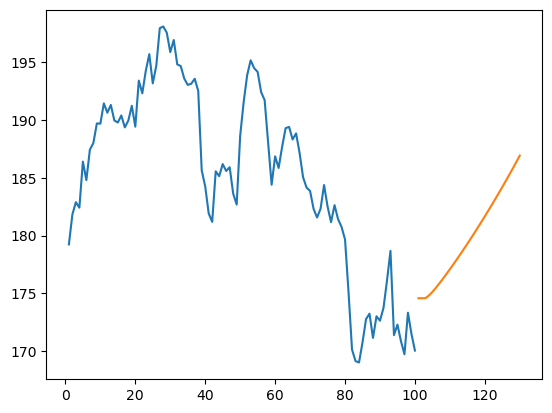

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

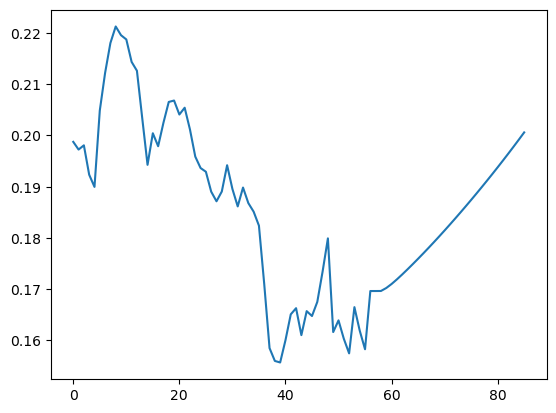

In [67]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

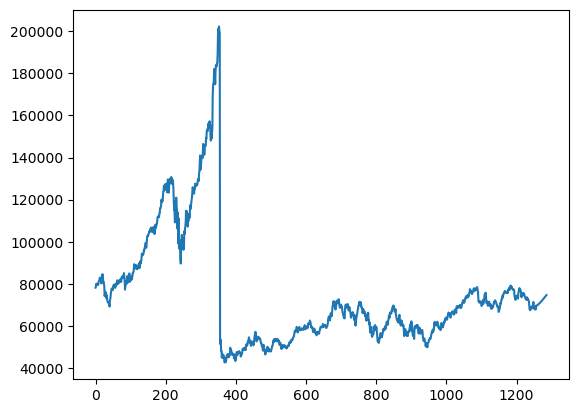

In [69]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)